<a href="https://colab.research.google.com/github/Khairul116/Breast-Cancer/blob/main/breST_cANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[39  4]
 [ 1 70]]


<ipython-input-1-1248326329>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Malignant (0)', 'Benign (1)'])


('              precision    recall  f1-score   support\n\n   malignant       0.97      0.91      0.94        43\n      benign       0.95      0.99      0.97        71\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n',
 <Figure size 1400x600 with 3 Axes>)

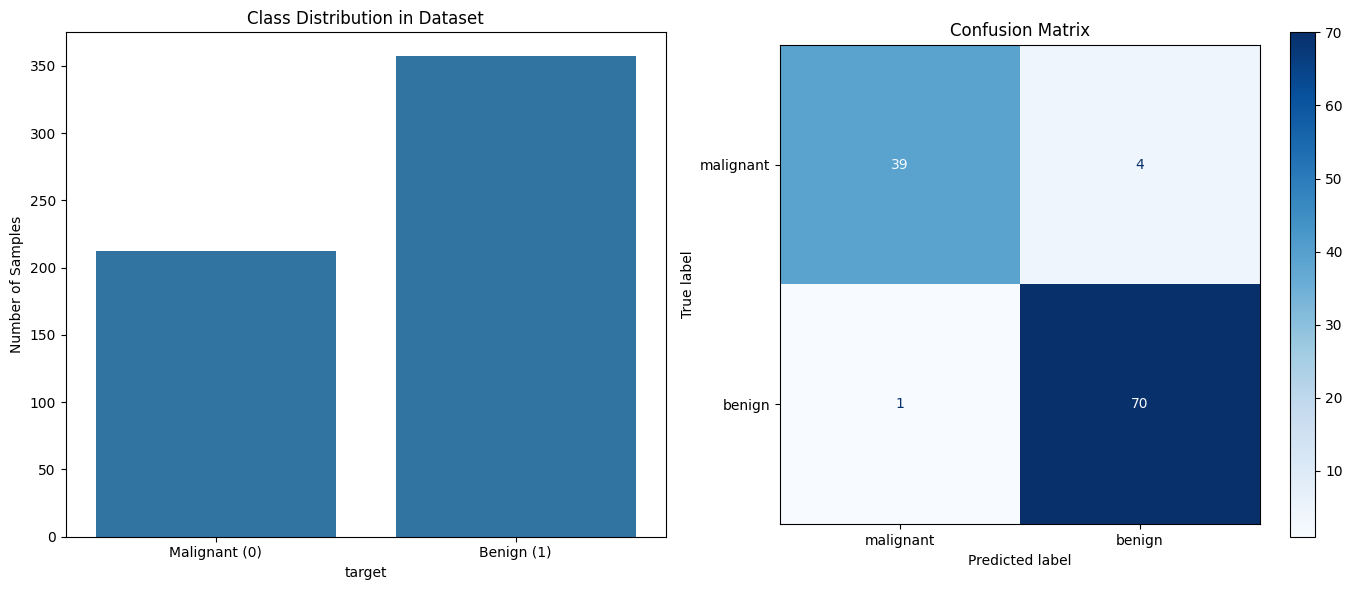

In [ ]:
# For a fun binary classification project with visualization and a confusion matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Load the breast cancer dataset (binary classification)
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")  # 0 = malignant, 1 = benign

# Visualize class balance
class_counts = y.value_counts()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=cancer.target_names)

# Plot class distribution and confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Class distribution
sns.barplot(x=class_counts.index, y=class_counts.values, ax=axs[0])
axs[0].set_xticklabels(['Malignant (0)', 'Benign (1)'])
axs[0].set_title('Class Distribution in Dataset')
axs[0].set_ylabel('Number of Samples')

# Confusion matrix
cmd.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix')

plt.tight_layout()

# Classification report
report = classification_report(y_test, y_pred, target_names=cancer.target_names)

report, plt.gcf()
